In [ ]:
!pip install torch
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
tensor = torch.randn(2, 2).to(device)
print(tensor.device)

print(torch.cuda.device_count())  # Imprime el número de GPUs disponibles

In [2]:
!nvidia-smi

Tue Oct 15 07:44:37 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.90                 Driver Version: 565.90         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   67C    P8             13W /  127W |      60MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
import os
import zipfile

# Ruta completa al archivo .zip
zip_file = r"C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\coco-2017-dataset.zip"

# Directorio donde se extraerán los archivos
extract_dir = "coco_dataset"
# Crear el directorio de extracción si no existe
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Extraer el archivo .zip
try:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(path=extract_dir)
    #print(f"Archivo {zip_file} extraído correctamente en {extract_dir}")
except Exception as e:
    print(f"Error al extraer el archivo: {e}")

In [7]:
import json

# Cargar archivo de anotaciones
with open(r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\coco_dataset\coco2017\annotations\instances_train2017.json') as f:
    coco_data = json.load(f)

# Extraer las categorías
categories = coco_data['categories']

# Mostrar las clases disponibles
for category in categories:
    print(f"ID: {category['id']}, Nombre: {category['name']}")

ID: 1, Nombre: person
ID: 2, Nombre: bicycle
ID: 3, Nombre: car
ID: 4, Nombre: motorcycle
ID: 5, Nombre: airplane
ID: 6, Nombre: bus
ID: 7, Nombre: train
ID: 8, Nombre: truck
ID: 9, Nombre: boat
ID: 10, Nombre: traffic light
ID: 11, Nombre: fire hydrant
ID: 13, Nombre: stop sign
ID: 14, Nombre: parking meter
ID: 15, Nombre: bench
ID: 16, Nombre: bird
ID: 17, Nombre: cat
ID: 18, Nombre: dog
ID: 19, Nombre: horse
ID: 20, Nombre: sheep
ID: 21, Nombre: cow
ID: 22, Nombre: elephant
ID: 23, Nombre: bear
ID: 24, Nombre: zebra
ID: 25, Nombre: giraffe
ID: 27, Nombre: backpack
ID: 28, Nombre: umbrella
ID: 31, Nombre: handbag
ID: 32, Nombre: tie
ID: 33, Nombre: suitcase
ID: 34, Nombre: frisbee
ID: 35, Nombre: skis
ID: 36, Nombre: snowboard
ID: 37, Nombre: sports ball
ID: 38, Nombre: kite
ID: 39, Nombre: baseball bat
ID: 40, Nombre: baseball glove
ID: 41, Nombre: skateboard
ID: 42, Nombre: surfboard
ID: 43, Nombre: tennis racket
ID: 44, Nombre: bottle
ID: 46, Nombre: wine glass
ID: 47, Nombre: cup

In [9]:
import csv
import json

# Cargar el archivo JSON
with open(r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\coco_dataset\coco2017\annotations\instances_train2017.json', 'r') as f:
    data = json.load(f)

# Obtener las categorías
categories = data['categories']

# Escribir en el archivo CSV
csv_filename = 'coco_categories.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    fieldnames = ['id', 'name', 'supercategory']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for category in categories:
        writer.writerow(category)

# Verificar el contenido del archivo CSV
with open(csv_filename, 'r') as csvfile:
    content = csvfile.read()
    print(f"Contenido del CSV (primeras 200 caracteres):\n{content[:200]}")

print(f"Se han escrito {len(categories)} categorías en {csv_filename}")

Contenido del CSV (primeras 200 caracteres):
id,name,supercategory
1,person,person
2,bicycle,vehicle
3,car,vehicle
4,motorcycle,vehicle
5,airplane,vehicle
6,bus,vehicle
7,train,vehicle
8,truck,vehicle
9,boat,vehicle
10,traffic light,outdoor
11,f
Se han escrito 80 categorías en coco_categories.csv


Imagen: 000000084489.jpg, Tamaño: 640x480
Imagen: 000000472296.jpg, Tamaño: 640x480
Imagen: 000000151005.jpg, Tamaño: 640x428
Imagen: 000000399879.jpg, Tamaño: 640x480
Imagen: 000000120721.jpg, Tamaño: 500x403


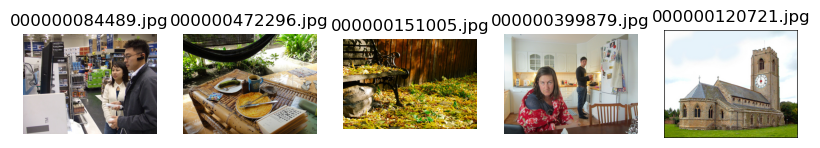

In [11]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Directorio de las imágenes
train_dir = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\coco_dataset\coco2017\train2017'

# Obtener una lista de archivos de imagen
image_files = [f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))]

# Seleccionar 5 imágenes aleatoriamente
random_images = random.sample(image_files, 5)

# Mostrar las imágenes y sus dimensiones
plt.figure(figsize=(10,5))
for i, image_file in enumerate(random_images):
    img = Image.open(os.path.join(train_dir, image_file))
    width, height = img.size
    print(f"Imagen: {image_file}, Tamaño: {width}x{height}")
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_file)
plt.show()

In [13]:
import os

# ruta de la carpeta
dir_path = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\coco_dataset\coco2017\train2017'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 118287


In [14]:
import os

# ruta de la carpeta
dir_path = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\coco_dataset\coco2017\val2017'
count = 0
# Itera dentro de la carpeta, es un contador
for path in os.listdir(dir_path):
    # verifica si la ruta actual es un arhico
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1
print('Número total de elementos:', count)

Número total de elementos: 5000


In [15]:
import os

# especificamos la ruta para el directorio - nos aseguramos de hacerlo entre comillas
ruta = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset'

# creamos un nuevo directorio
os.mkdir(ruta)

In [18]:
print("YA TERMINÉ")

YA TERMINÉ


In [20]:
import os

# especificamos la ruta para el directorio - nos aseguramos de hacerlo entre comillas
ruta = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\images'

# creamos un nuevo directorio
os.mkdir(ruta)

In [21]:
import os

# especificamos la ruta para el directorio - nos aseguramos de hacerlo entre comillas
ruta = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\labels'

# creamos un nuevo directorio
os.mkdir(ruta)

In [6]:
import os

# especificamos la ruta para el directorio - nos aseguramos de hacerlo entre comillas
ruta = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\labels\train'

# creamos un nuevo directorio
os.mkdir(ruta)

In [8]:
import os

# especificamos la ruta para el directorio - nos aseguramos de hacerlo entre comillas
ruta = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\labels\val'

# creamos un nuevo directorio
os.mkdir(ruta)

In [1]:
import json
import os
from PIL import Image

# Rutas
coco_annotations_path = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\coco_dataset\coco2017\annotations\instances_train2017.json'
output_dir = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\labels\train'
images_dir = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\coco_dataset\coco2017\train2017'

# Asegurarse de que el directorio de salida exista
os.makedirs(output_dir, exist_ok=True)

# Predefinir el mapeo de categorías con los índices correctos
category_mapping = {
    1: 0,  # person
    2: 1,  # bicycle
    3: 2,  # car
    4: 3,  # motorcycle
    5: 4,  # airplane
    6: 5,  # bus
    7: 6,  # train
    8: 7,  # truck
    9: 8,  # boat
    10: 9,  # traffic light
    11: 10,  # fire hydrant
    13: 11,  # stop sign
    14: 12,  # parking meter
    15: 13,  # bench
    16: 14,  # bird
    17: 15,  # cat
    18: 16,  # dog
    19: 17,  # horse
    20: 18,  # sheep
    21: 19,  # cow
    22: 20,  # elephant
    23: 21,  # bear
    24: 22,  # zebra
    25: 23,  # giraffe
    27: 24,  # backpack
    28: 25,  # umbrella
    31: 26,  # handbag
    32: 27,  # tie
    33: 28,  # suitcase
    34: 29,  # frisbee
    35: 30,  # skis
    36: 31,  # snowboard
    37: 32,  # sports ball
    38: 33,  # kite
    39: 34,  # baseball bat
    40: 35,  # baseball glove
    41: 36,  # skateboard
    42: 37,  # surfboard
    43: 38,  # tennis racket
    44: 39,  # bottle
    46: 40,  # wine glass
    47: 41,  # cup
    48: 42,  # fork
    49: 43,  # knife
    50: 44,  # spoon
    51: 45,  # bowl
    52: 46,  # banana
    53: 47,  # apple
    54: 48,  # sandwich
    55: 49,  # orange
    56: 50,  # broccoli
    57: 51,  # carrot
    58: 52,  # hot dog
    59: 53,  # pizza
    60: 54,  # donut
    61: 55,  # cake
    62: 56,  # chair
    63: 57,  # couch
    64: 58,  # potted plant
    65: 59,  # bed
    67: 60,  # dining table
    70: 61,  # toilet
    72: 62,  # tv
    73: 63,  # laptop
    74: 64,  # mouse
    75: 65,  # remote
    76: 66,  # keyboard
    77: 67,  # cell phone
    78: 68,  # microwave
    79: 69,  # oven
    80: 70,  # toaster
    81: 71,  # sink
    82: 72,  # refrigerator
    84: 73,  # book
    85: 74,  # clock
    86: 75,  # vase
    87: 76,  # scissors
    88: 77,  # teddy bear
    89: 78,  # hair drier
    90: 79   # toothbrush
}

# Cargar el archivo JSON de anotaciones COCO
with open(coco_annotations_path, 'r') as f:
    coco_data = json.load(f)

# Crear un diccionario para almacenar las dimensiones de las imágenes
image_dimensions = {}

# Obtener las dimensiones de todas las imágenes
for image_info in coco_data['images']:
    image_id = image_info['id']
    image_filename = f"{str(image_id).zfill(12)}.jpg"  # Asegurarse de que el nombre tenga 12 dígitos
    image_path = os.path.join(images_dir, image_filename)
    try:
        with Image.open(image_path) as img:
            image_dimensions[image_id] = img.size
    except IOError:
        print(f"No se pudo abrir la imagen: {image_filename}")

# Procesar las anotaciones
for annotation in coco_data['annotations']:
    image_id = annotation['image_id']
    original_category_id = annotation['category_id']

    if original_category_id not in category_mapping:
        #print(f"Categoría ID {original_category_id} no encontrada en el mapeo.")
        continue

    # Obtener el ID mapeado desde el diccionario predefinido
    category_id = category_mapping[original_category_id]

    bbox = annotation['bbox']

    if image_id not in image_dimensions:
        #print(f"No se encontraron dimensiones para la imagen ID: {image_id}")
        continue

    image_width, image_height = image_dimensions[image_id]

    # Convertir la caja delimitadora (bbox) al formato YOLO (normalizado)
    x, y, width, height = bbox
    x_center = (x + width / 2) / image_width
    y_center = (y + height / 2) / image_height
    width /= image_width
    height /= image_height

    # Crear el archivo de anotaciones YOLO
    yolo_annotation = f"{category_id} {x_center} {y_center} {width} {height}\n"

    # Asegurarse de que el nombre del archivo de etiquetas también tenga 12 dígitos
    label_filename = os.path.join(output_dir, f"{str(image_id).zfill(12)}.txt")
    with open(label_filename, 'a') as label_file:
        label_file.write(yolo_annotation)

print("Conversión completada.")

Conversión completada.


In [5]:
import json
import os
from PIL import Image

# Rutas
coco_annotations_path = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\coco_dataset\coco2017\annotations\instances_val2017.json'
output_dir = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\labels\val'
images_dir = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\coco_dataset\coco2017\val2017'

# Asegurarse de que el directorio de salida exista
os.makedirs(output_dir, exist_ok=True)

# Predefinir el mapeo de categorías con los índices correctos
category_mapping = {
    1: 0,  # person
    2: 1,  # bicycle
    3: 2,  # car
    4: 3,  # motorcycle
    5: 4,  # airplane
    6: 5,  # bus
    7: 6,  # train
    8: 7,  # truck
    9: 8,  # boat
    10: 9,  # traffic light
    11: 10,  # fire hydrant
    13: 11,  # stop sign
    14: 12,  # parking meter
    15: 13,  # bench
    16: 14,  # bird
    17: 15,  # cat
    18: 16,  # dog
    19: 17,  # horse
    20: 18,  # sheep
    21: 19,  # cow
    22: 20,  # elephant
    23: 21,  # bear
    24: 22,  # zebra
    25: 23,  # giraffe
    27: 24,  # backpack
    28: 25,  # umbrella
    31: 26,  # handbag
    32: 27,  # tie
    33: 28,  # suitcase
    34: 29,  # frisbee
    35: 30,  # skis
    36: 31,  # snowboard
    37: 32,  # sports ball
    38: 33,  # kite
    39: 34,  # baseball bat
    40: 35,  # baseball glove
    41: 36,  # skateboard
    42: 37,  # surfboard
    43: 38,  # tennis racket
    44: 39,  # bottle
    46: 40,  # wine glass
    47: 41,  # cup
    48: 42,  # fork
    49: 43,  # knife
    50: 44,  # spoon
    51: 45,  # bowl
    52: 46,  # banana
    53: 47,  # apple
    54: 48,  # sandwich
    55: 49,  # orange
    56: 50,  # broccoli
    57: 51,  # carrot
    58: 52,  # hot dog
    59: 53,  # pizza
    60: 54,  # donut
    61: 55,  # cake
    62: 56,  # chair
    63: 57,  # couch
    64: 58,  # potted plant
    65: 59,  # bed
    67: 60,  # dining table
    70: 61,  # toilet
    72: 62,  # tv
    73: 63,  # laptop
    74: 64,  # mouse
    75: 65,  # remote
    76: 66,  # keyboard
    77: 67,  # cell phone
    78: 68,  # microwave
    79: 69,  # oven
    80: 70,  # toaster
    81: 71,  # sink
    82: 72,  # refrigerator
    84: 73,  # book
    85: 74,  # clock
    86: 75,  # vase
    87: 76,  # scissors
    88: 77,  # teddy bear
    89: 78,  # hair drier
    90: 79   # toothbrush
}

# Cargar el archivo JSON de anotaciones COCO
with open(coco_annotations_path, 'r') as f:
    coco_data = json.load(f)

# Crear un diccionario para almacenar las dimensiones de las imágenes
image_dimensions = {}

# Obtener las dimensiones de todas las imágenes
for image_info in coco_data['images']:
    image_id = image_info['id']
    image_filename = f"{str(image_id).zfill(12)}.jpg"  # Asegurarse de que el nombre tenga 12 dígitos
    image_path = os.path.join(images_dir, image_filename)
    try:
        with Image.open(image_path) as img:
            image_dimensions[image_id] = img.size
    except IOError:
        print(f"No se pudo abrir la imagen: {image_filename}")

# Procesar las anotaciones
for annotation in coco_data['annotations']:
    image_id = annotation['image_id']
    original_category_id = annotation['category_id']

    if original_category_id not in category_mapping:
        #print(f"Categoría ID {original_category_id} no encontrada en el mapeo.")
        continue

    # Obtener el ID mapeado desde el diccionario predefinido
    category_id = category_mapping[original_category_id]

    bbox = annotation['bbox']

    if image_id not in image_dimensions:
        #print(f"No se encontraron dimensiones para la imagen ID: {image_id}")
        continue

    image_width, image_height = image_dimensions[image_id]

    # Convertir la caja delimitadora (bbox) al formato YOLO (normalizado)
    x, y, width, height = bbox
    x_center = (x + width / 2) / image_width
    y_center = (y + height / 2) / image_height
    width /= image_width
    height /= image_height

    # Crear el archivo de anotaciones YOLO
    yolo_annotation = f"{category_id} {x_center} {y_center} {width} {height}\n"

    # Asegurarse de que el nombre del archivo de etiquetas también tenga 12 dígitos
    label_filename = os.path.join(output_dir, f"{str(image_id).zfill(12)}.txt")
    with open(label_filename, 'a') as label_file:
        label_file.write(yolo_annotation)

print("Conversión completada.")

Conversión completada.


In [7]:
import shutil

# Ruta de la carpeta de origen
source_path = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\coco_dataset\coco2017\train2017'

# Ruta de destino
destination_path = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\images'

# Mover la carpeta
shutil.move(source_path, destination_path)

print("Carpeta movida con éxito.")


Carpeta movida con éxito.


In [9]:
import shutil

# Ruta de la carpeta de origen
source_path = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\coco_dataset\coco2017\val2017'

# Ruta de destino
destination_path = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\images'

# Mover la carpeta
shutil.move(source_path, destination_path)

print("Carpeta movida con éxito.")


Carpeta movida con éxito.


In [13]:
import os

# Directorios de imágenes y etiquetas
train_images_dir = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\images\train2017'
train_labels_dir = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\labels\train'
val_images_dir = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\images\val2017'
val_labels_dir = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\labels\val'

# Función para obtener la lista de archivos sin la extensión
def obtener_archivos_sin_extension(directorio, extension):
    archivos = [os.path.splitext(f)[0] for f in os.listdir(directorio) if f.endswith(extension)]
    return set(archivos)

# Obtener los archivos de imágenes y etiquetas (sin extensión)
train_images = obtener_archivos_sin_extension(train_images_dir, '.jpg')
train_labels = obtener_archivos_sin_extension(train_labels_dir, '.txt')
val_images = obtener_archivos_sin_extension(val_images_dir, '.jpg')
val_labels = obtener_archivos_sin_extension(val_labels_dir, '.txt')

# Comparar imágenes y etiquetas en train y val
imagenes_sin_etiquetas_train = train_images - train_labels
imagenes_sin_etiquetas_val = val_images - val_labels

# Mostrar imágenes sin etiquetas sin eliminarlas
print(f'Imágenes sin etiquetas en train: {len(imagenes_sin_etiquetas_train)}')
print(f'Imágenes sin etiquetas en val: {len(imagenes_sin_etiquetas_val)}')

# Eliminar imágenes sin etiquetas en train
if imagenes_sin_etiquetas_train:
    print('Eliminando imágenes sin etiquetas en train:')
    for img in imagenes_sin_etiquetas_train:
        img_path = os.path.join(train_images_dir, img + '.jpg')
        print(f'Eliminando {img_path}')
        os.remove(img_path)  # Eliminar la imagen

# Eliminar imágenes sin etiquetas en val
if imagenes_sin_etiquetas_val:
    print('Eliminando imágenes sin etiquetas en val:')
    for img in imagenes_sin_etiquetas_val:
        img_path = os.path.join(val_images_dir, img + '.jpg')
        #print(f'Eliminando {img_path}')
        os.remove(img_path)  # Eliminar la imagen

Imágenes sin etiquetas en train: 0
Imágenes sin etiquetas en val: 0


In [37]:
import os

# Directorio de las imágenes
images_dir = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\images\train2017'

# Directorio donde se guardará el archivo train2017.txt
output_dir = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset'

# Nombre del archivo de salida
output_file = 'train2017.txt'

# Función para obtener las rutas de las imágenes
def get_image_paths(images_dir):
    image_paths = []
    for image_file in os.listdir(images_dir):
        if image_file.endswith('.jpg'):
            # Construimos la ruta absoluta de la imagen
            image_path = os.path.join(images_dir, image_file)
            # Convertimos la ruta a formato adecuado para evitar errores de barras invertidas
            image_path = image_path.replace('\\', '/')
            image_paths.append(image_path)
    return image_paths

# Obtener las rutas de las imágenes
image_paths = get_image_paths(images_dir)

# Escribir las rutas en el archivo train2017.txt
output_path = os.path.join(output_dir, output_file)
with open(output_path, 'w') as f:
    for path in image_paths:
        f.write(path + '\n')

print(f"Se ha creado el archivo {output_file} con {len(image_paths)} rutas de imágenes.")

Se ha creado el archivo train2017.txt con 117266 rutas de imágenes.


In [39]:
import os

# Directorio de las imágenes
images_dir = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\images\val2017'

# Directorio donde se guardará el archivo train2017.txt
output_dir = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset'

# Nombre del archivo de salida
output_file = 'val2017.txt'

# Función para obtener las rutas de las imágenes
def get_image_paths(images_dir):
    image_paths = []
    for image_file in os.listdir(images_dir):
        if image_file.endswith('.jpg'):
            # Construimos la ruta absoluta de la imagen
            image_path = os.path.join(images_dir, image_file)
            # Convertimos la ruta a formato adecuado para evitar errores de barras invertidas
            image_path = image_path.replace('\\', '/')
            image_paths.append(image_path)
    return image_paths

# Obtener las rutas de las imágenes
image_paths = get_image_paths(images_dir)

# Escribir las rutas en el archivo train2017.txt
output_path = os.path.join(output_dir, output_file)
with open(output_path, 'w') as f:
    for path in image_paths:
        f.write(path + '\n')

print(f"Se ha creado el archivo {output_file} con {len(image_paths)} rutas de imágenes.")


Se ha creado el archivo val2017.txt con 4952 rutas de imágenes.


In [15]:
import os

# Ruta donde se encuentran las imágenes y las etiquetas
image_folder = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\images\val2017'
label_folder = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\labels\val'

# Extensiones de imagen soportadas
image_extensions = ['.jpg', '.jpeg', '.png']

# Verificación de imágenes y etiquetas
missing_labels = []
for image_file in os.listdir(image_folder):
    # Verifica si el archivo es una imagen
    if any(image_file.endswith(ext) for ext in image_extensions):
        # Cambia la extensión del archivo de imagen a .txt
        txt_file = os.path.splitext(image_file)[0] + '.txt'
        txt_path = os.path.join(label_folder, txt_file)
        
        # Verifica si el archivo .txt correspondiente existe
        if not os.path.exists(txt_path):
            missing_labels.append(image_file)

if missing_labels:
    print(f"Faltan archivos .txt para las siguientes imágenes: {missing_labels}")
else:
    print("Todas las imágenes tienen su archivo .txt correspondiente.")

Todas las imágenes tienen su archivo .txt correspondiente.


In [17]:
import os

# Ruta donde se encuentran las imágenes y las etiquetas
image_folder = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\images\train2017'
label_folder = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\labels\train'

# Extensiones de imagen soportadas
image_extensions = ['.jpg', '.jpeg', '.png']

# Verificación de imágenes y etiquetas
missing_labels = []
for image_file in os.listdir(image_folder):
    # Verifica si el archivo es una imagen
    if any(image_file.endswith(ext) for ext in image_extensions):
        # Cambia la extensión del archivo de imagen a .txt
        txt_file = os.path.splitext(image_file)[0] + '.txt'
        txt_path = os.path.join(label_folder, txt_file)
        
        # Verifica si el archivo .txt correspondiente existe
        if not os.path.exists(txt_path):
            missing_labels.append(image_file)

if missing_labels:
    print(f"Faltan archivos .txt para las siguientes imágenes: {missing_labels}")
else:
    print("Todas las imágenes tienen su archivo .txt correspondiente.")

Todas las imágenes tienen su archivo .txt correspondiente.


In [19]:
import re

image_folder = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\images\train2017'
label_folder = r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\labels\train'

# Expresión regular para verificar el formato <clase> <x_centro> <y_centro> <ancho_normalizado> <alto_normalizado>
pattern = re.compile(r"^\d+(\.\d+)? \d+(\.\d+)? \d+(\.\d+)? \d+(\.\d+)? \d+(\.\d+)?$")

incorrect_format = []
for txt_file in os.listdir(label_folder):
    txt_path = os.path.join(label_folder, txt_file)
    
    # Abrir y verificar el contenido del archivo .txt
    with open(txt_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # Verifica si la línea sigue el formato esperado
            if not pattern.match(line.strip()):
                incorrect_format.append(txt_file)
                break  # No es necesario revisar más líneas de este archivo

if incorrect_format:
    print(f"Los siguientes archivos .txt tienen un formato incorrecto: {incorrect_format}")
else:
    print("Todos los archivos .txt tienen el formato correcto.")

Todas las imágenes tienen su archivo .txt correspondiente.


In [1]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
tensor = torch.randn(2, 2).to(device)
print(tensor.device)
device = torch.device('cuda:0')  # Forzar uso de la primera GPU NVIDIA

cpu


In [3]:
logger = 'Comet' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .

Note: you may need to restart the kernel to use updated packages.


COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()


In [3]:
!pip install ultralytics

  Using cached ultralytics-8.3.13-py3-none-any.whl.metadata (34 kB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
Using cached ultralytics-8.3.13-py3-none-any.whl (870 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   --------- ------------------------------ 1.8/7.8 MB 12.6 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 18.3 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 18.6 MB/s eta 0:00:00
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -------------------- ------------------- 5.8/11.5 MB 27.1 MB/s eta 0:00:01
   ---------------------------- ----------- 8.1/11.5 MB 24.0 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 19.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ?

In [4]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.13  Python-3.12.7 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Setup complete  (16 CPUs, 15.7 GB RAM, 705.0/952.8 GB disk)


In [1]:
!pip install ultralytics
from ultralytics import YOLO
import torch

# Verificar si la GPU está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Cargar el modelo YOLOv8 para detección
model = YOLO('yolo11n.pt')

# Mover el modelo a la GPU si está disponible
model = model.to(device)

# Imprimir el dispositivo utilizado (cuda o cpu)
print("Usando el dispositivo:", device)

# Entrenar el modelo en la GPU
model.train(data=r'CompleteCOCO.yaml', epochs=30, imgsz=640, workers=2)

# Durante el entrenamiento, abre una terminal y ejecuta:
# nvidia-smi

Usando el dispositivo: cuda
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=CompleteCOCO.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=2, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, op

train: Scanning C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\labels\train2017.cache... 117266 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117266/117266 [00:00<?, ?it/s]

train: WARNING  C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\images\train2017\000000099844.jpg: 2 duplicate labels removed
train: WARNING  C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\images\train2017\000000201706.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\images\train2017\000000214087.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\images\train2017\000000522365.jpg: 1 duplicate labels removed



val: Scanning C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\labels\val2017.cache... 4952 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]


Plotting labels to runs\detect\train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs\detect\train10
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.37G      1.198      1.405       1.24         55        640: 100%|██████████| 7330/7330 [23:14<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:34<00:00,  4.43it/s]


                   all       4952      36781      0.586      0.422       0.45      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.29G      1.321      1.731      1.324         36        640: 100%|██████████| 7330/7330 [22:53<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.59it/s]


                   all       4952      36781      0.565      0.403      0.426      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.19G      1.414      2.001      1.399         36        640: 100%|██████████| 7330/7330 [22:43<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.60it/s]


                   all       4952      36781      0.539      0.371      0.393      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.79G      1.423      2.035       1.41         17        640: 100%|██████████| 7330/7330 [22:45<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.59it/s]


                   all       4952      36781      0.549      0.382      0.406      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.96G      1.377      1.908      1.377         22        640: 100%|██████████| 7330/7330 [22:53<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.68it/s]


                   all       4952      36781      0.565      0.399      0.429      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.09G      1.351      1.841      1.359         12        640: 100%|██████████| 7330/7330 [22:43<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:34<00:00,  4.55it/s]


                   all       4952      36781      0.575       0.41      0.441      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.59G      1.331      1.789      1.345         56        640: 100%|██████████| 7330/7330 [22:54<00:00,  5.33it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.64it/s]


                   all       4952      36781      0.572       0.42      0.448       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       4.1G      1.319      1.753      1.335         27        640: 100%|██████████| 7330/7330 [22:55<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.61it/s]


                   all       4952      36781      0.581      0.421      0.452      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.64G      1.308      1.725      1.327         43        640: 100%|██████████| 7330/7330 [23:17<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.62it/s]


                   all       4952      36781      0.593      0.421      0.456      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       4.4G      1.299      1.697      1.319         20        640: 100%|██████████| 7330/7330 [23:00<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.57it/s]


                   all       4952      36781      0.597      0.423       0.46       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.24G      1.291      1.678      1.315         16        640: 100%|██████████| 7330/7330 [23:07<00:00,  5.28it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.63it/s]


                   all       4952      36781      0.602      0.422      0.463      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.09G      1.286      1.661      1.309         37        640: 100%|██████████| 7330/7330 [23:06<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.61it/s]


                   all       4952      36781      0.599       0.43      0.467      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.73G      1.276      1.644      1.303         14        640: 100%|██████████| 7330/7330 [22:53<00:00,  5.34it/s] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.69it/s]


                   all       4952      36781      0.593      0.435       0.47      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.07G      1.271      1.625      1.297         31        640: 100%|██████████| 7330/7330 [22:54<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.64it/s]


                   all       4952      36781      0.595      0.439      0.474      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.74G      1.266       1.61      1.295          7        640: 100%|██████████| 7330/7330 [23:09<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.68it/s]


                   all       4952      36781      0.592      0.445      0.478      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.32G      1.258      1.595      1.289         50        640: 100%|██████████| 7330/7330 [23:04<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.68it/s]


                   all       4952      36781      0.584      0.452      0.481      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.08G      1.252      1.578      1.285         13        640: 100%|██████████| 7330/7330 [22:40<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.70it/s]


                   all       4952      36781      0.604      0.447      0.485      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.06G      1.246      1.562       1.28         26        640: 100%|██████████| 7330/7330 [22:41<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:32<00:00,  4.76it/s]


                   all       4952      36781      0.607       0.45      0.487      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.47G      1.241      1.548      1.276         38        640: 100%|██████████| 7330/7330 [22:37<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.65it/s]


                   all       4952      36781      0.619       0.45       0.49      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.89G      1.233      1.527       1.27         60        640: 100%|██████████| 7330/7330 [22:51<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.68it/s]


                   all       4952      36781      0.618      0.454      0.492      0.346
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.77G       1.23      1.426      1.264          4        640: 100%|██████████| 7330/7330 [20:41<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:32<00:00,  4.70it/s]


                   all       4952      36781      0.613      0.457      0.494      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.17G       1.22      1.401      1.257         23        640: 100%|██████████| 7330/7330 [20:47<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:32<00:00,  4.71it/s]


                   all       4952      36781      0.613       0.46      0.496      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.68G      1.209      1.377      1.248         34        640: 100%|██████████| 7330/7330 [20:36<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.69it/s]


                   all       4952      36781      0.619       0.46      0.499      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.14G      1.198      1.353      1.241          6        640: 100%|██████████| 7330/7330 [20:29<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:32<00:00,  4.77it/s]


                   all       4952      36781      0.623       0.46      0.501      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.62G       1.19      1.331      1.234          4        640: 100%|██████████| 7330/7330 [20:26<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:32<00:00,  4.70it/s]


                   all       4952      36781      0.631      0.459      0.503      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.87G       1.18      1.307      1.225         30        640: 100%|██████████| 7330/7330 [20:30<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:32<00:00,  4.71it/s]


                   all       4952      36781      0.625      0.462      0.504      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.15G      1.167      1.281      1.218          3        640: 100%|██████████| 7330/7330 [20:46<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:32<00:00,  4.74it/s]


                   all       4952      36781      0.626      0.465      0.507      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.63G      1.156      1.256      1.209          3        640: 100%|██████████| 7330/7330 [20:36<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:32<00:00,  4.70it/s]


                   all       4952      36781      0.627      0.466      0.509       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       3.9G      1.146      1.232      1.204         27        640: 100%|██████████| 7330/7330 [23:30<00:00,  5.20it/s]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:43<00:00,  3.56it/s]


                   all       4952      36781      0.629      0.468      0.511      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.57G      1.134       1.21      1.196         30        640: 100%|██████████| 7330/7330 [25:24<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:34<00:00,  4.44it/s]


                   all       4952      36781      0.631      0.467      0.512      0.364

30 epochs completed in 11.509 hours.
Optimizer stripped from runs\detect\train10\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train10\weights\best.pt, 5.5MB

Validating runs\detect\train10\weights\best.pt...
Ultralytics 8.3.13  Python-3.12.7 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:40<00:00,  3.86it/s]


                   all       4952      36781      0.631      0.467      0.512      0.363
                person       2693      11004      0.757      0.652       0.73      0.498
               bicycle        149        316      0.604      0.402      0.439       0.26
                   car        535       1932      0.642      0.505      0.545       0.35
            motorcycle        159        371      0.691      0.543      0.623      0.394
              airplane         97        143      0.707      0.762      0.812      0.649
                   bus        189        285      0.757      0.663      0.733      0.617
                 train        157        190      0.812      0.768      0.829      0.654
                 truck        250        415      0.545      0.405      0.436      0.299
                  boat        121        430      0.564      0.307      0.378      0.199
         traffic light        191        637      0.622      0.349      0.391      0.197
          fire hydran

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000131C95731D0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0

In [2]:

model = YOLO(r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\runs\detect\train10\weights\best.pt')  # load a custom model


# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics 8.3.13  Python-3.12.7 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


val: Scanning C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\labels\val2017.cache... 4952 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 310/310 [00:41<00:00,  7.43it/s]


                   all       4952      36781      0.631      0.468      0.512      0.363
                person       2693      11004      0.756      0.653       0.73      0.498
               bicycle        149        316      0.604      0.405      0.439      0.258
                   car        535       1932      0.644      0.506      0.545      0.349
            motorcycle        159        371      0.694      0.544      0.622      0.394
              airplane         97        143      0.704      0.755      0.812      0.648
                   bus        189        285      0.754      0.663      0.732      0.616
                 train        157        190      0.815      0.768      0.829      0.653
                 truck        250        415      0.547      0.405      0.436      0.299
                  boat        121        430      0.571      0.307      0.381        0.2
         traffic light        191        637      0.615      0.351      0.391      0.198
          fire hydran

array([    0.49802,     0.25841,      0.3495,     0.39376,     0.64777,     0.61636,     0.65264,     0.29895,     0.20033,     0.19783,     0.62272,     0.60779,     0.42351,     0.19153,     0.26148,     0.67292,     0.61303,     0.56946,     0.45951,     0.49043,     0.61896,     0.71687,     0.65862,     0.66289,
          0.089193,     0.34569,    0.064839,     0.25586,     0.32696,     0.60159,      0.1874,     0.23837,     0.33642,     0.38463,     0.18939,     0.29983,     0.42957,     0.31194,     0.39194,      0.2864,      0.2442,     0.33423,     0.23909,    0.083195,    0.079697,     0.37494,     0.22236,     0.14595,
            0.3215,     0.28925,     0.20636,     0.15774,     0.29634,     0.49866,     0.42546,     0.33402,     0.24094,     0.43511,     0.20816,     0.44364,     0.30226,     0.65244,     0.54204,     0.56751,     0.50415,     0.16976,     0.46873,     0.26904,     0.51321,     0.33123,     0.24419,      0.3464,
           0.52366,    0.091714,      0.447

In [1]:
import os
import random
from pathlib import Path
from ultralytics import YOLO
import cv2

# Directorio de las imágenes
image_dir = r"C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\coco_dataset\coco2017\test2017"

# Obtener lista de todas las imágenes
all_images = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Seleccionar 10 imágenes aleatorias
random_images = random.sample(all_images, 10)

# Cargar el modelo entrenado
model = YOLO(r'C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\runs\detect\train10\weights\best.pt')  # Asegúrate de poner la ruta correcta a tu modelo

# Realizar inferencia en las imágenes seleccionadas
for img_name in random_images:
    img_path = os.path.join(image_dir, img_name)
    
    # Realizar la detección
    results = model(img_path)
    
    # Visualizar y guardar los resultados
    img = cv2.imread(img_path)
    for r in results:
        im_array = r.plot()  # plot a BGR numpy array of predictions
        im = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)
        cv2.imshow("Resultado", im)
        cv2.waitKey(0)
        
        # Opcional: guardar la imagen con las detecciones
        output_path = os.path.join(r"C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\30EPOCHS", f"output_{img_name}")
        cv2.imwrite(output_path, im)

cv2.destroyAllWindows()


image 1/1 C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\coco_dataset\coco2017\test2017\000000340606.jpg: 480x640 1 car, 1 cat, 2 dogs, 63.7ms
Speed: 2.0ms preprocess, 63.7ms inference, 141.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\coco_dataset\coco2017\test2017\000000246019.jpg: 448x640 4 persons, 1 bottle, 1 cake, 63.9ms
Speed: 2.0ms preprocess, 63.9ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\coco_dataset\coco2017\test2017\000000401119.jpg: 640x448 2 persons, 1 dog, 1 skateboard, 54.1ms
Speed: 3.6ms preprocess, 54.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)

image 1/1 C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\coco_dataset\coco2017\test2017\000000083841.jpg: 480x640 1 person, 2 cars, 1 baseball bat, 50.3ms
Speed: 4.0ms preprocess, 50.3ms inference, 6.0ms postprocess per i

In [2]:
print("hello")

hello


In [1]:
from ultralytics import YOLO
import torch

# Verificar si la GPU está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Cargar el modelo YOLOv8 para detección
model = YOLO('yolo11n.pt')

# Mover el modelo a la GPU si está disponible
model = model.to(device)

# Imprimir el dispositivo utilizado (cuda o cpu)
print("Usando el dispositivo:", device)

model.train(data='CompleteCOCO.yaml', epochs=50, imgsz=640, batch=16, workers=4, lr0=0.01, momentum=0.937, weight_decay=0.0005, amp=True)

Usando el dispositivo: cuda
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=CompleteCOCO.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=4, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, op

train: Scanning C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\labels\train2017.cache... 117266 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117266/117266 [00:00<?, ?it/s]

train: WARNING  C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\images\train2017\000000099844.jpg: 2 duplicate labels removed
train: WARNING  C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\images\train2017\000000201706.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\images\train2017\000000214087.jpg: 1 duplicate labels removed
train: WARNING  C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\images\train2017\000000522365.jpg: 1 duplicate labels removed



val: Scanning C:\Users\User\Documents\DETECCION_KAGGLE_COCO_20_EPOCHS\dataset\labels\val2017.cache... 4952 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]


Plotting labels to runs\detect\train14\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs\detect\train14
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.89G      1.198      1.397      1.239         16        640: 100%|██████████| 7330/7330 [23:59<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:37<00:00,  4.19it/s]


                   all       4952      36781      0.573       0.43      0.454      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.11G      1.316      1.714      1.323         22        640: 100%|██████████| 7330/7330 [21:48<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:35<00:00,  4.43it/s]


                   all       4952      36781      0.555      0.399      0.426       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.54G      1.412       1.98      1.395          7        640: 100%|██████████| 7330/7330 [21:13<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:35<00:00,  4.42it/s]


                   all       4952      36781      0.555      0.366      0.393      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.09G      1.424      2.021       1.41         28        640: 100%|██████████| 7330/7330 [21:04<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.59it/s]


                   all       4952      36781      0.545      0.382      0.404      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.91G      1.378        1.9      1.377         11        640: 100%|██████████| 7330/7330 [20:37<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.62it/s]


                   all       4952      36781      0.568      0.401      0.429      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.98G      1.353      1.837      1.361         21        640: 100%|██████████| 7330/7330 [20:39<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.67it/s]


                   all       4952      36781      0.576      0.408       0.44      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.07G      1.338      1.792      1.349         10        640: 100%|██████████| 7330/7330 [20:37<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.65it/s]


                   all       4952      36781      0.574      0.416      0.446      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.84G      1.327      1.761      1.339         24        640: 100%|██████████| 7330/7330 [20:40<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:34<00:00,  4.48it/s]


                   all       4952      36781      0.565      0.426      0.449       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.36G      1.318      1.737      1.334          9        640: 100%|██████████| 7330/7330 [20:39<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:32<00:00,  4.70it/s]


                   all       4952      36781      0.571      0.426      0.453      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.79G       1.31      1.717      1.329          7        640: 100%|██████████| 7330/7330 [20:38<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.66it/s]


                   all       4952      36781      0.577      0.427      0.455      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.22G      1.305      1.704      1.324         53        640: 100%|██████████| 7330/7330 [20:42<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.65it/s]


                   all       4952      36781      0.577       0.43      0.458      0.318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.53G      1.302      1.692       1.32         22        640: 100%|██████████| 7330/7330 [20:45<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.61it/s]


                   all       4952      36781      0.584      0.429      0.461       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.33G      1.294      1.678      1.316         15        640: 100%|██████████| 7330/7330 [20:48<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.62it/s]


                   all       4952      36781      0.588      0.434      0.465      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.14G       1.29      1.668      1.313         29        640: 100%|██████████| 7330/7330 [20:43<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.62it/s]


                   all       4952      36781      0.589      0.436      0.468      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.84G      1.288      1.656       1.31         21        640: 100%|██████████| 7330/7330 [20:48<00:00,  5.87it/s] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.65it/s]


                   all       4952      36781      0.589       0.44      0.471      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.45G      1.284      1.651      1.308         24        640: 100%|██████████| 7330/7330 [20:48<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.59it/s]


                   all       4952      36781      0.592      0.441      0.474       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       3.8G      1.279      1.642      1.306         16        640: 100%|██████████| 7330/7330 [20:55<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.59it/s]


                   all       4952      36781      0.591      0.445      0.476      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.63G      1.277      1.634      1.303         37        640: 100%|██████████| 7330/7330 [20:53<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.62it/s]


                   all       4952      36781      0.604      0.445      0.479      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.72G      1.274      1.624      1.301         32        640: 100%|██████████| 7330/7330 [20:58<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.61it/s]


                   all       4952      36781      0.604      0.446      0.481      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.36G      1.271      1.616      1.297         20        640: 100%|██████████| 7330/7330 [20:57<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.60it/s]


                   all       4952      36781       0.61      0.446      0.483      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.95G      1.267      1.606      1.295         43        640: 100%|██████████| 7330/7330 [21:00<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.59it/s]


                   all       4952      36781      0.609      0.447      0.485       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.37G      1.262      1.603      1.293         11        640: 100%|██████████| 7330/7330 [21:02<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:34<00:00,  4.53it/s]


                   all       4952      36781      0.615      0.448      0.487      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.33G      1.261      1.594      1.291         26        640: 100%|██████████| 7330/7330 [21:04<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:34<00:00,  4.53it/s]


                   all       4952      36781      0.613       0.45      0.489      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.96G      1.259      1.585      1.288         27        640: 100%|██████████| 7330/7330 [21:08<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.56it/s]


                   all       4952      36781      0.617       0.45       0.49      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.47G      1.257      1.582      1.286         28        640: 100%|██████████| 7330/7330 [21:11<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:34<00:00,  4.55it/s]


                   all       4952      36781      0.613      0.452      0.492      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.89G      1.254      1.569      1.284         50        640: 100%|██████████| 7330/7330 [21:12<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:34<00:00,  4.51it/s]


                   all       4952      36781      0.619       0.45      0.493      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.92G       1.25       1.56      1.281         15        640: 100%|██████████| 7330/7330 [21:11<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.65it/s]


                   all       4952      36781      0.622       0.45      0.495      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.17G      1.246      1.556      1.281         36        640: 100%|██████████| 7330/7330 [21:45<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:36<00:00,  4.19it/s]


                   all       4952      36781       0.62      0.451      0.495      0.348

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.23G      1.242      1.546      1.278          9        640: 100%|██████████| 7330/7330 [21:44<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.59it/s]


                   all       4952      36781      0.618      0.453      0.497      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.44G      1.237      1.535      1.274         30        640: 100%|██████████| 7330/7330 [21:03<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.59it/s]


                   all       4952      36781      0.625      0.453      0.498       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.13G      1.233      1.527      1.271          6        640: 100%|██████████| 7330/7330 [21:02<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:36<00:00,  4.29it/s]


                   all       4952      36781      0.623      0.454      0.499      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.74G      1.232      1.516      1.269         18        640: 100%|██████████| 7330/7330 [21:04<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:34<00:00,  4.54it/s]


                   all       4952      36781      0.616      0.459        0.5      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.99G      1.226      1.511      1.267         79        640: 100%|██████████| 7330/7330 [21:05<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.58it/s]


                   all       4952      36781      0.618      0.463      0.501      0.353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.72G      1.224      1.498      1.263         25        640: 100%|██████████| 7330/7330 [21:04<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.57it/s]


                   all       4952      36781      0.617      0.465      0.503      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.06G      1.221       1.49      1.262         17        640: 100%|██████████| 7330/7330 [20:59<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:34<00:00,  4.55it/s]


                   all       4952      36781      0.613      0.469      0.504      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.15G      1.217      1.483      1.259         39        640: 100%|██████████| 7330/7330 [21:00<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.63it/s]


                   all       4952      36781      0.618      0.471      0.505      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.27G      1.213      1.473      1.257         44        640: 100%|██████████| 7330/7330 [20:57<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:36<00:00,  4.20it/s]


                   all       4952      36781      0.623       0.47      0.507      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       4.4G      1.208      1.461      1.253         24        640: 100%|██████████| 7330/7330 [21:45<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:34<00:00,  4.55it/s]


                   all       4952      36781      0.623      0.471      0.508      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.47G      1.205      1.451       1.25         33        640: 100%|██████████| 7330/7330 [20:59<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.57it/s]


                   all       4952      36781      0.622      0.468      0.508      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.97G      1.199       1.44      1.247         43        640: 100%|██████████| 7330/7330 [21:04<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:34<00:00,  4.53it/s]


                   all       4952      36781      0.623       0.47       0.51       0.36
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.33G      1.192      1.339      1.235          5        640: 100%|██████████| 7330/7330 [20:58<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:36<00:00,  4.25it/s]


                   all       4952      36781      0.621      0.472      0.511      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.94G      1.183      1.315      1.229         14        640: 100%|██████████| 7330/7330 [21:41<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:37<00:00,  4.18it/s]


                   all       4952      36781      0.618      0.475      0.512      0.363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.13G      1.175      1.297      1.222         22        640: 100%|██████████| 7330/7330 [20:35<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:32<00:00,  4.71it/s]


                   all       4952      36781      0.615      0.476      0.513      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.38G      1.168      1.281      1.216         14        640: 100%|██████████| 7330/7330 [21:24<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:34<00:00,  4.56it/s]


                   all       4952      36781      0.617      0.476      0.514      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.42G       1.16      1.262      1.211         13        640: 100%|██████████| 7330/7330 [21:27<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.65it/s]


                   all       4952      36781      0.615      0.478      0.515      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.81G      1.154      1.247      1.206         13        640: 100%|██████████| 7330/7330 [20:36<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.61it/s]


                   all       4952      36781      0.617      0.478      0.516      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.72G      1.145       1.23      1.201         12        640: 100%|██████████| 7330/7330 [20:40<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:33<00:00,  4.58it/s]


                   all       4952      36781      0.616      0.479      0.517      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.67G      1.137      1.213      1.196         14        640: 100%|██████████| 7330/7330 [20:32<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:31<00:00,  4.89it/s]


                   all       4952      36781      0.615      0.479      0.517      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.17G      1.129      1.196      1.191         16        640: 100%|██████████| 7330/7330 [19:28<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:29<00:00,  5.21it/s]


                   all       4952      36781      0.612      0.481      0.519      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.66G      1.122      1.179      1.185         29        640: 100%|██████████| 7330/7330 [19:30<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:29<00:00,  5.26it/s]


                   all       4952      36781      0.617      0.482       0.52      0.369

50 epochs completed in 18.023 hours.
Optimizer stripped from runs\detect\train14\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train14\weights\best.pt, 5.5MB

Validating runs\detect\train14\weights\best.pt...
Ultralytics 8.3.13  Python-3.12.7 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 155/155 [00:31<00:00,  4.93it/s]


                   all       4952      36781      0.617      0.482       0.52      0.369
                person       2693      11004      0.741      0.666      0.735      0.503
               bicycle        149        316      0.636      0.415      0.459       0.27
                   car        535       1932      0.625      0.518      0.556      0.355
            motorcycle        159        371      0.699      0.577       0.64      0.409
              airplane         97        143      0.731      0.778      0.833      0.663
                   bus        189        285      0.792      0.681       0.75      0.631
                 train        157        190      0.798      0.789      0.851      0.673
                 truck        250        415      0.516      0.401      0.432        0.3
                  boat        121        430      0.584       0.35      0.386      0.205
         traffic light        191        637      0.612       0.35      0.397      0.204
          fire hydran

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001549B11CB00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0